# Лабораторная работа №2

ФИО: Щедрова Милана Вячеславовна

Группа: БИВТ-21-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [4]:
import numpy as np
import pandas as pd
data = pd.read_csv('student_data.csv')
data.head()  # если нужно, можно поменять разделитель

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 1. Название датасета

student_data

## 2. Описание постановки задачи

Постановка задачи включает анализ данных о студентах с целью предсказания оценки студента (Grade(G3)) на основе данных из набора student_data. Целевое событие является непрерывным (предсказываем число от -∞ до ∞). Набор данных может содержать категориальные признаки с несбалансированными категориями. Датасет содержит следующие переменные: идентификатор школы, пол, возраст, размер семьи, образование отца и матери, занятость родителей, семейные отношения, здоровье и текущие оценки студентов. Целевое событие непрерывно(предсказание числовой оценки).

## 3. Распределение целевой переменной

Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.

<Axes: >

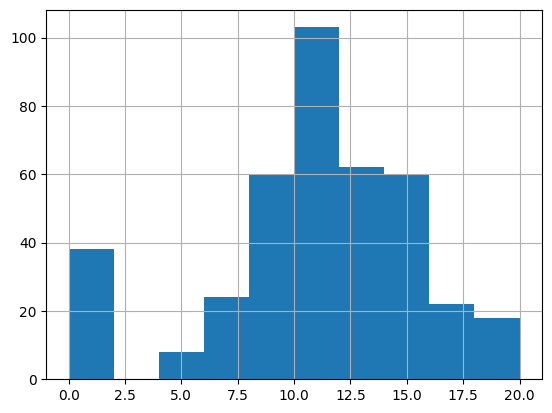

In [5]:
import matplotlib.pyplot as plt
data['G3'].hist(bins=10)

После построения диаграммы, мы можем заметить, что чаще всего встречаемая оценка - это 10-11 баллов

А также, мы можем увидеть, что ни один студент не получил оценку в 2-4 балла

Распределение несовсем равномерно

## 4. Основные статистики в датасете

Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 5. Основная информация по датасету

Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 6. Количество пропусков

Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 

In [8]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

В нашем датасете отсутсвуют пропуски, это значит, что студенты внесли все отвветы на вопросы анкетирования, и никто ничего не пропустил.

## 7. Построение гистограмм

Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.

Text(0.5, 1.0, 'Гистограмма возраста')

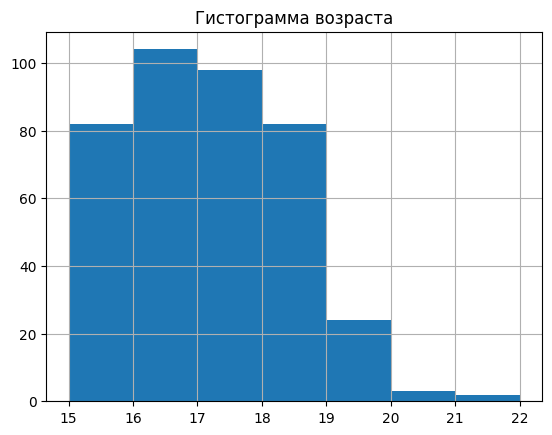

In [9]:
data['age'].hist(bins=7)
plt.title('Гистограмма возраста')


Text(0.5, 1.0, 'Гистограмма пола')

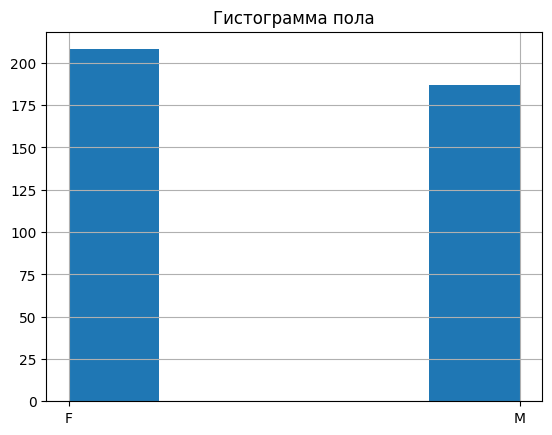

In [10]:
data['sex'].hist(bins=5)
plt.title('Гистограмма пола')

Text(0.5, 1.0, 'Образование матери')

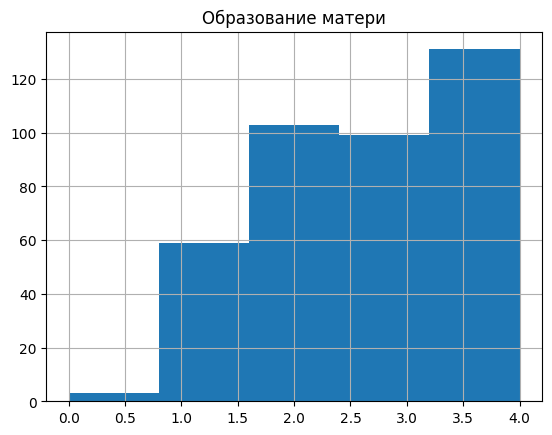

In [11]:
data['Medu'].hist(bins=5)
plt.title('Образование матери')

Text(0.5, 1.0, 'Образование отца')

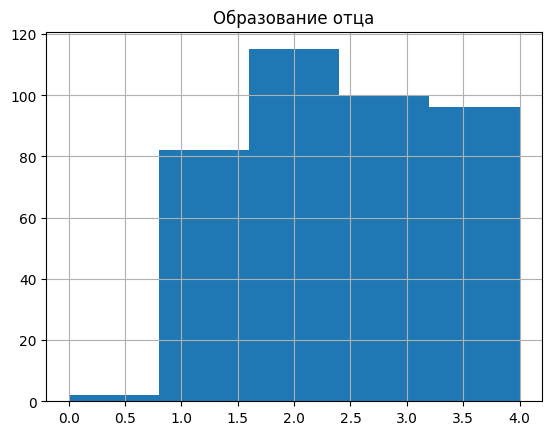

In [12]:
data['Fedu'].hist(bins=5)
plt.title('Образование отца')

Text(0.5, 1.0, 'Еженедельное время на образование')

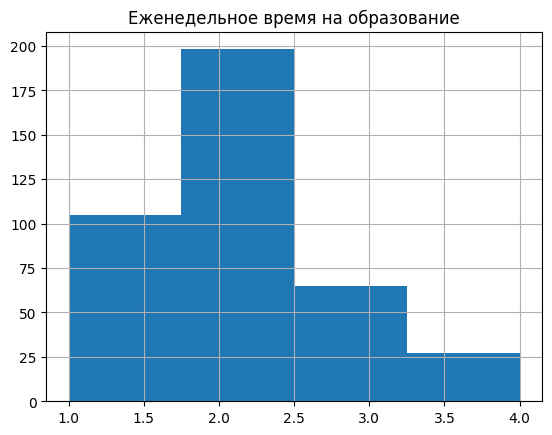

In [13]:
data['studytime'].hist(bins=4)
plt.title('Еженедельное время на образование') #weekly study time 

Большинство студентов имеют возраст до 19 лет. Также в большинстве случаев уровень образования матери превышает уровень образования отца, среднее время, которое студенты тратят на учебу - 2 часа. Сильных нессимитричность в графиках не наблюдается. Количество девушек студентов, несильно превышает количество парней студентов.

## 8. Построение графиков зависимости

Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной) 

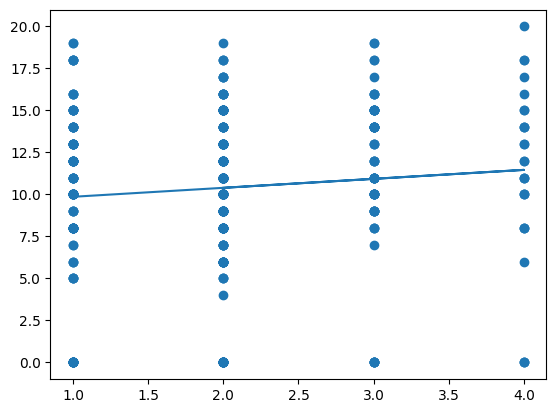

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x=data["studytime"]
y=data["G3"]
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, a*x+b)

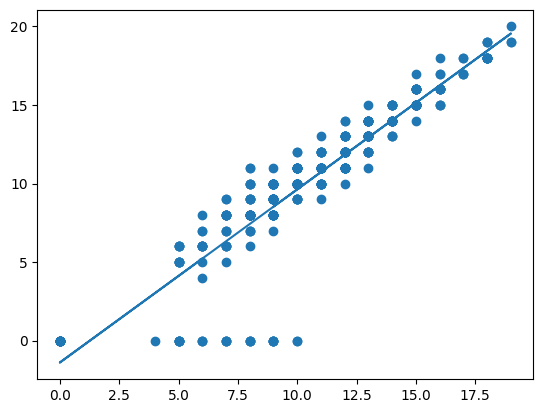

In [15]:
x=data["G2"]
y=data["G3"]
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, a*x+b)

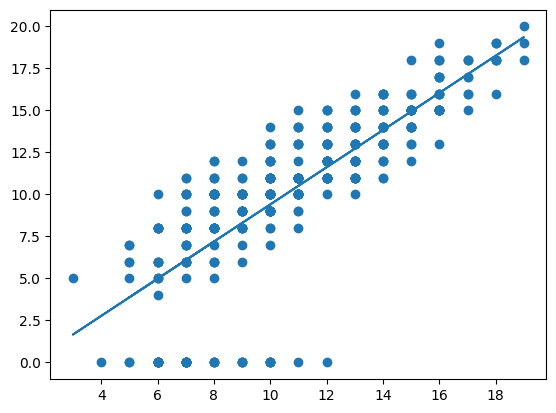

In [24]:
x=data["G1"]
y=data["G3"]
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, a*x+b)

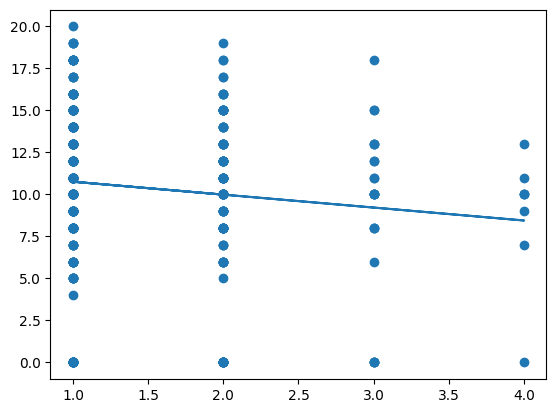

In [17]:
x=data['traveltime']
y=data["G3"]
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, a*x+b)

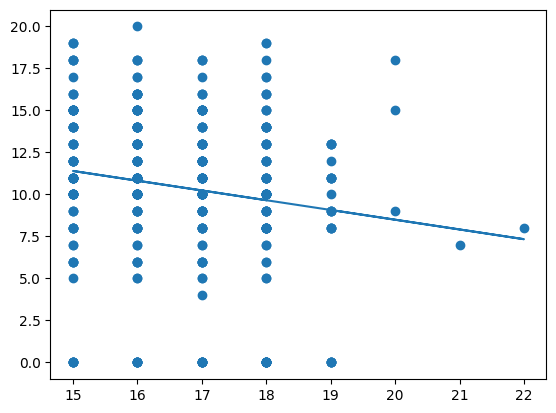

In [18]:
x=data['age']
y=data["G3"]
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, a*x+b)

Мы можем заметить сильно выраженную линейную свзять между параметром G3 и параметрами G2, G1.
Также можно увидеть, что баллы, полученные за финальный тест зависят положительно от веремни, затраченного на подготовку, и отрицательно, от времени, которое было потрачено на дорогу до университета.

## 9. Зависимость от двух переменных

 _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

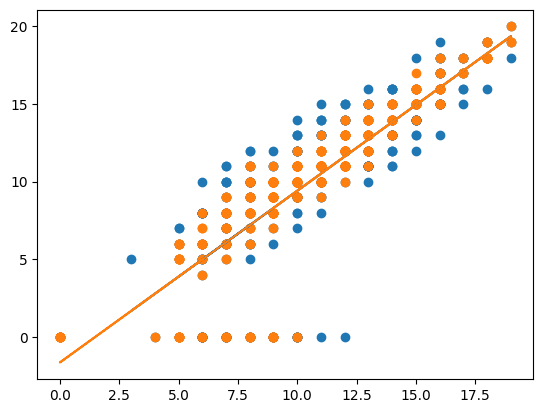

In [22]:
x=data["G1"]
y=data["G3"]
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, a*x+b)
x=data["G2"]
plt.scatter(x, y)
plt.plot(x, a*x+b)
